<a href="https://colab.research.google.com/github/Tenshin17/DATASCI/blob/Geospatial/Xu_Geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing conda and geopanda

###Miniconda

In [1]:
#%env PYTHONPATH=

In [2]:
# %%bash
# MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
# MINICONDA_PREFIX=/usr/local
# wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
# chmod +x $MINICONDA_INSTALLER_SCRIPT
# ./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [3]:
# !which conda

In [4]:
# !conda --version

In [5]:
# !which python

In [6]:
# !python --version

In [7]:
# %%bash
# conda install --channel defaults conda python=3.6 --yes
# conda update --channel defaults --all --yes

In [8]:
# !conda --version # now returns 4.8.3
# !python --version

In [9]:
# import sys
# sys.path

In [10]:
# !ls /usr/local/lib/python3.6/dist-packages

In [11]:
# import sys
# _ = (sys.path
        # .append("/usr/local/lib/python3.6/site-packages"))

In [12]:
# !conda install --channel conda-forge featuretools --yes

In [13]:
# !conda install --channel conda-forge geopandas

###geopanda

In [14]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 15.3MB 289kB/s 
     |████████████████████████████████| 6.5MB 29.1MB/s 


In [15]:
!pip install geoplot

     |████████████████████████████████| 12.1MB 7.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.1MB 208kB/s 
     |████████████████████████████████| 225kB 38.9MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516148 sha256=f5770af60a35cef39d092feffa4bd6dfbe516a5f4a5b9ee55adedf1bdccdcd33
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=b9c7029ce2484690e8652ffd89600d2e3c3d762a484d8c445f2ac723c295c248
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [16]:
!pip install rtree pygeos

     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 2.1MB 9.5MB/s 


In [17]:
 !pip install pipdeptree

In [18]:
!pipdeptree

Warning!!! Possibly conflicting dependencies found:
* albumentations==0.1.12
 - imgaug [required: >=0.2.5,<0.2.7, installed: 0.2.9]
* datascience==0.10.6
 - folium [required: ==0.2.1, installed: 0.8.3]
* nbclient==0.5.3
 - jupyter-client [required: >=6.1.5, installed: 5.3.5]
------------------------------------------------------------------------
albumentations==0.1.12
  - imgaug [required: >=0.2.5,<0.2.7, installed: 0.2.9]
    - imageio [required: Any, installed: 2.4.1]
      - numpy [required: Any, installed: 1.19.5]
      - pillow [required: Any, installed: 7.1.2]
    - matplotlib [required: Any, installed: 3.2.2]
      - cycler [required: >=0.10, installed: 0.10.0]
        - six [required: Any, installed: 1.15.0]
      - kiwisolver [required: >=1.0.1, installed: 1.3.1]
      - numpy [required: >=1.11, installed: 1.19.5]
      - pyparsing [required: >=2.0.1,!=2.1.6,!=2.1.2,!=2.0.4, installed: 2.4.7]
      - python-dateutil [required: >=2.1, installed: 2.8.1]
        - six [required:

In [19]:
!pip show geopandas

Name: geopandas
Version: 0.9.0
Summary: Geographic pandas extensions
Home-page: http://geopandas.org
Author: GeoPandas contributors
Author-email: kjordahl@alum.mit.edu
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, shapely, pyproj, fiona
Required-by: geoplot


##Example

In [20]:
import os
import rtree
import pygeos
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Populating the interactive namespace from numpy and matplotlib


In [21]:
#gpd.read_file?

In [22]:
# Read shapefile
ph = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/DATASCI/DSDATA/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [23]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.44448662100001,
 127.08919715900001,
 3.7627797585000007,
 21.894300891500002)

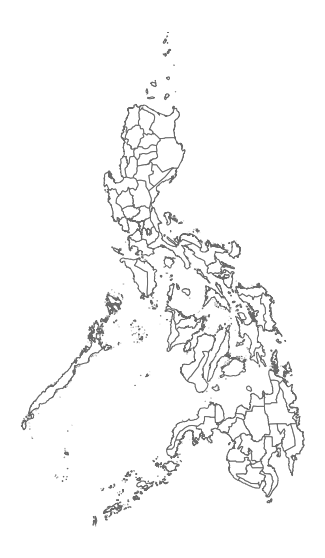

In [24]:
ax = ph.plot(figsize=(20,10), color="w", edgecolor="dimgray")

ax.axis('off')

In [25]:
# Read GeoJSON file
healthsites = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/DATASCI/DSDATA/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

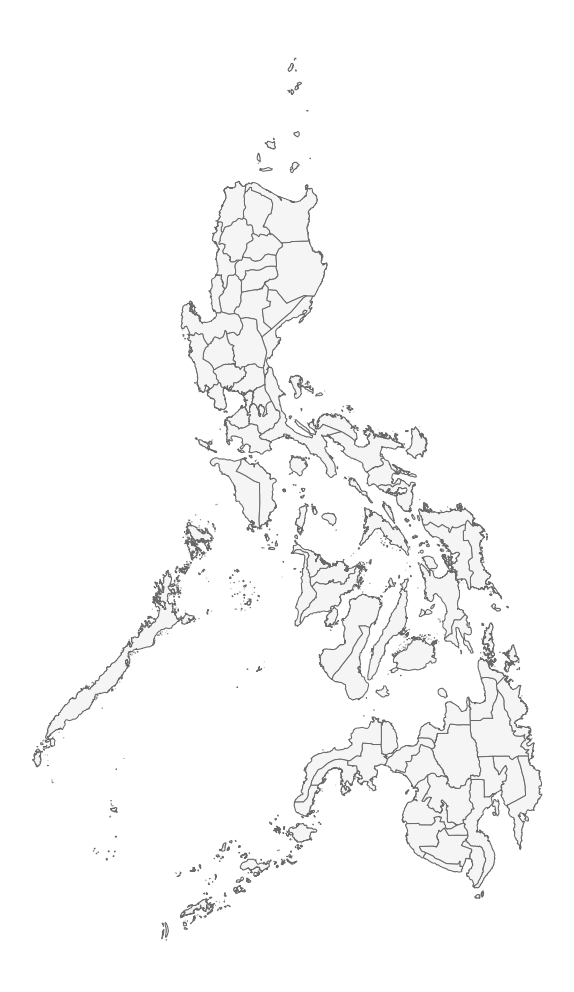

In [26]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

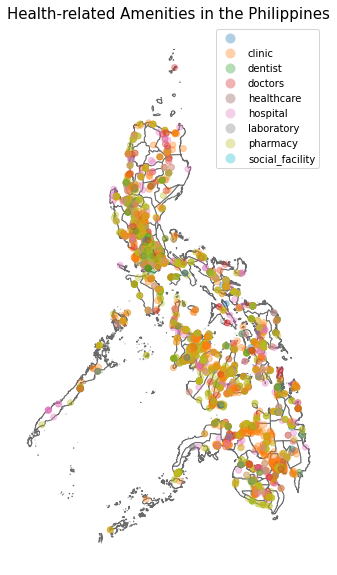

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [28]:
healthsites.describe(include=np.object)

,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10365,10405,10405,10405,10405,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,10333,2,247,2,80,1,1,3,7953,282,409,432,6592,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,c2a1c7db87434c1599407b01e687c9f4,,,,,,,,2020-10-16T22:34:26,,,,,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,2,10403,9645,10404,9317,10405,10405,9913,110,10041,8657,8190,935,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [29]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

In [30]:
healthsites.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


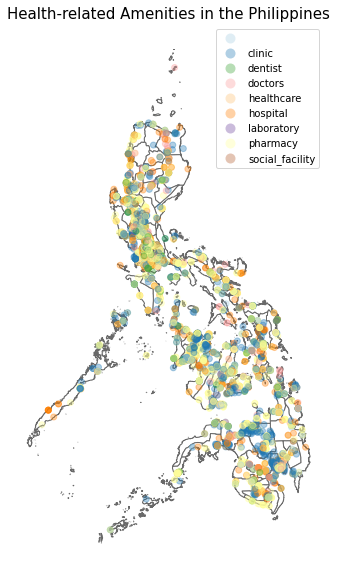

In [31]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

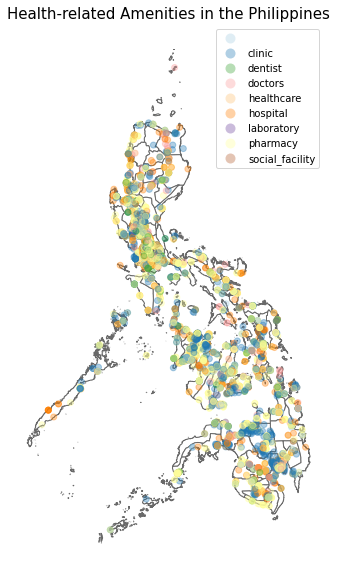

In [32]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

##Data splitting

###Check number of 'amenity' in the Philippines

In [33]:
healthsites['amenity'].value_counts()

pharmacy           4078
clinic             2673
hospital           2085
dentist             698
doctors             441
                    393
laboratory           33
social_facility       3
healthcare            1
Name: amenity, dtype: int64

####Clinics

In [34]:
clinicdata= pd.DataFrame()
clinicdata= clinicdata.append(healthsites.loc[healthsites['amenity']=='clinic'])
clinicdata=clinicdata.reset_index(drop=True)
clinicdata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,678983870,node,9.0,,clinic,,,,,4282186.0,,,,5a6298fbe1134b5682a5666d887b7eb4,,,,arivac,,,1.0,,2010-03-31T02:49:01,,,,,,arivac_bohol,,,,,,,None,None,POINT (123.98877 9.79335)
1,223628093,way,12.0,,clinic,,,,,55569745.0,,,,55afc9678ff54253870cb318bfa528a5,,,,"DigitalGlobe, NextView",,,4.0,,2018-01-19T06:47:28,,,,Santa Fe Main Health Center,,GOwin,,,,,,,None,None,"POLYGON ((123.80724 11.15379, 123.80734 11.153..."
2,4358211423,node,9.0,,clinic,,,,,41569012.0,,,,e1e92c08eb124c36ac03deaf88b305f5,,,,,,,1.0,,2016-08-20T02:44:31,,,,Pinamungajan Rural Health Office,,eli bryn,,,,,,,None,None,POINT (123.58445 10.27042)
3,150954402,way,21.0,,clinic,,Mindanao Avenue,,,78462500.0,,,,708b42b1a47042b9ad44899cebe4b193,,,,,,,6.0,,2019-12-16T08:37:04,,6000,Cebu,Maxicare Healthcare Corporation - Primary Care...,,raytsky123,,,,,clinic,,None,None,"POLYGON ((123.90701 10.31938, 123.90708 10.319..."
4,6374111785,node,18.0,,clinic,,Arnaldo Boulevard,,,68727612.0,,,,e9089037b2db4016bf09b63a15340415,,Mo-Su 09:00-07:00,,,,,1.0,,2019-03-31T15:31:23,,5800,,Ajera Dental Clinic,,Noela,,,,,,,None,None,POINT (122.75056 11.59396)


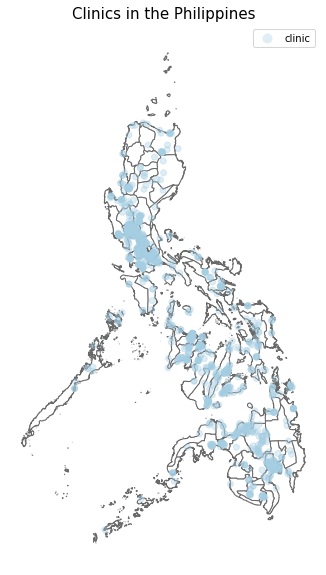

In [35]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
clinicdata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in the Philippines', fontsize=15)
ax.axis('off');

####Pharmacy

In [36]:
pharmacydata= pd.DataFrame()
pharmacydata= pharmacydata.append(healthsites.loc[healthsites['amenity']=='pharmacy'])
pharmacydata=pharmacydata.reset_index(drop=True)
pharmacydata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
2,8076834059,node,28.0,,pharmacy,,Magsaysay,Edito Vitug,water_works,93459190.0,,,,d94f45a21f7c44d48b2702a6efd347f7,,,,survey,,,1.0,,2020-11-03T06:42:55,,,,We Care Drug,,KristeleH,,,,,pharmacy,private,None,None,POINT (120.56550 14.91256)
3,1018210574,node,21.0,,pharmacy,,Marcelo H. del Pilar Avenue,,,96334310.0,,,,f94a6632d31449d284c575b87cf9ecd4,,,,,,,7.0,,2020-12-23T15:09:20,,4001,Alaminos,TGP,,ianlopez1115,,,,,pharmacy,,None,None,POINT (121.24557 14.06309)
4,4451774792,node,9.0,,pharmacy,,,,,64321897.0,,,,37b51dad248c41ebbc62e5dd09bdbbf5,,,,,,,2.0,,2018-11-09T11:28:09,,,,Jamaica Pharmacy,,GOwin,,,,,,,None,None,POINT (120.46787 14.86910)


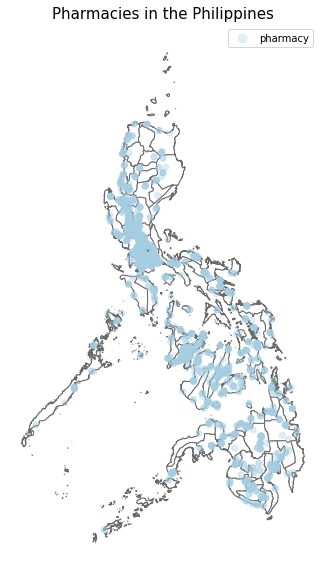

In [37]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
pharmacydata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in the Philippines', fontsize=15)
ax.axis('off');

####Hospital

In [38]:
hospitaldata= pd.DataFrame()
hospitaldata= hospitaldata.append(healthsites.loc[healthsites['amenity']=='hospital'])
hospitaldata=hospitaldata.reset_index(drop=True)
hospitaldata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
1,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."
2,836665474,way,6.0,,hospital,,,,,89330707.0,,,,054199520a654010b97bc91a949413f1,,,,,,,1.0,,2020-08-13T04:26:53,,,,,,TagaSanPedroAko,,,,,,,None,None,"POLYGON ((123.52054 13.60460, 123.52061 13.604..."
3,164577919,way,9.0,,hospital,,,,,11669251.0,,,,b933ab64ce484210bd24e28feea97318,,,,,,,2.0,,2012-05-22T08:32:03,,,,Mateo Diagnostic Hospital,,DY3JDR,,,,,,,None,None,"POLYGON ((120.94741 14.80955, 120.94767 14.809..."
4,118806480,way,25.0,,hospital,,,Department of Health,,90566600.0,,,+6345 4552390;+6345 9612870 loc. 126;+6345 435...,af01a3d7ab0d48c698d4005d8e07100c,,,,,,,7.0,yes,2020-09-08T07:01:13,,,,Jose B. Lingad Memorial Regional Hospital,,jmres,,,,,hospital,government,None,None,"POLYGON ((120.68357 15.03443, 120.68441 15.035..."


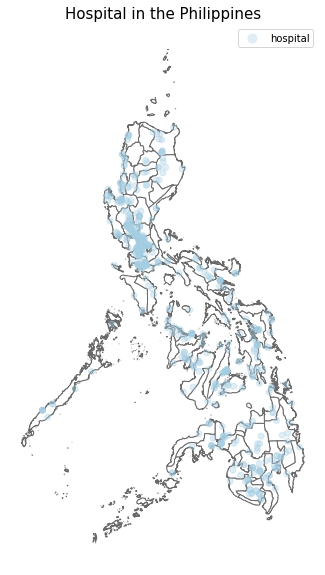

In [39]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
hospitaldata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Hospital in the Philippines', fontsize=15)
ax.axis('off');

####Dentist

In [40]:
dentistdata= pd.DataFrame()
dentistdata= dentistdata.append(healthsites.loc[healthsites['amenity']=='dentist'])
dentistdata=dentistdata.reset_index(drop=True)
dentistdata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,3940989272,node,9.0,,dentist,,,,,36520157.0,,,,400e3290408b42dca0b4464c4890378c,,,,,,,1.0,,2016-01-12T06:48:29,,,,Olaguer Dental,,Albayano,,,,,,,None,None,POINT (123.74586 13.13973)
1,796284976,way,9.0,,dentist,,,,,84795442.0,,,,893a1a5f33244c50a96e9a8bd5d255e5,,,,,,,2.0,,2020-05-07T02:47:29,,,,,,GraniteBender,,,,,dentist,,None,None,"POLYGON ((121.05898 14.73862, 121.05904 14.738..."
2,6094206413,node,12.0,,dentist,,,,,64918083.0,,,,d1af050104014e4fae973b3b726524e5,,,,,,,1.0,,2018-11-27T02:01:14,,,,Beethoven Pedrera Dental Clinic,,antonggyox,,,,,dentist,,None,None,POINT (125.25121 10.35143)
3,409903248,way,12.0,,dentist,,,,,41077167.0,,,,f6abc35781884e57939d146ee4bb4068,,,,,,,4.0,,2016-07-28T04:58:03,,4119,Amadeo,,,schadow1,,,,,,,None,None,"POLYGON ((120.92430 14.17193, 120.92443 14.171..."
4,31929685,way,15.0,,dentist,dentistry,,,,73110112.0,,,,afb865e602eb4caf84c059926054db62,,,,,,,2.0,,2019-08-07T12:43:05,,,,St Angelique Dentist,,Chief Mike Kouklis,,,,,dentist,,None,None,"POLYGON ((121.92703 11.96480, 121.92710 11.964..."


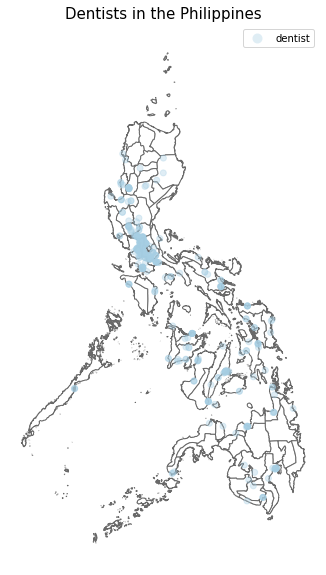

In [41]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
dentistdata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Dentists in the Philippines', fontsize=15)
ax.axis('off');

####Doctors

In [42]:
doctorsdata= pd.DataFrame()
doctorsdata= doctorsdata.append(healthsites.loc[healthsites['amenity']=='doctors'])
doctorsdata=doctorsdata.reset_index(drop=True)
doctorsdata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
1,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,,,,6c702af37c4a49d89dac127cc8a229f6,,,,,,,1.0,,2016-08-22T18:10:30,73-G,,,NYTheraspine,,FortuneSolace,,,,,,,None,None,POINT (121.03133 14.63151)
2,1234678368,node,9.0,,doctors,,,,,14932205.0,,,,54c434cd8f5341319f65ff0ed29531ef,,,,,,,2.0,,2013-02-06T11:15:17,,,,District B Main Health Center,,docsam,,,,,,,None,None,POINT (125.60659 7.09059)
3,7785286855,node,15.0,,doctors,,,Dr. Joel Nicdao,,88948893.0,,,,e8cbb811bbf04c399e8db923270ab9a1,,,,,,,2.0,,2020-08-04T21:25:54,,,,McGill Mediplus,,mapbeks,,,,,doctor,,None,None,POINT (121.04419 14.55357)
4,192928381,way,15.0,,doctors,,,,,73347432.0,,,,a655861af2034bd8be7a83beac76b1b5,,,,docsam,,,2.0,,2019-08-14T12:46:27,,9000,,San Ignacio Medical Clinic,,XaintXinner,,,,,,,None,None,"POLYGON ((124.63661 8.47271, 124.63663 8.47287..."


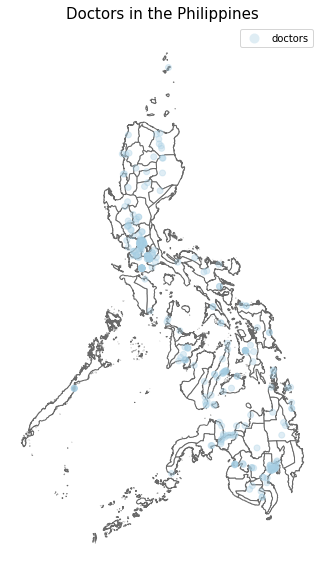

In [43]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
doctorsdata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in the Philippines', fontsize=15)
ax.axis('off');

####Laboratory

In [44]:
laboratorydata= pd.DataFrame()
laboratorydata= laboratorydata.append(healthsites.loc[healthsites['amenity']=='laboratory'])
laboratorydata=laboratorydata.reset_index(drop=True)
laboratorydata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,8076445521,node,28.0,,laboratory,,Jose Abad Santos Avenue,Dr. Almalyn C. Sevilla,water_works,93449504.0,,,,8ec8ea24e5e34d5d98a76c9c3c65350f,,,,survey,,,1.0,,2020-11-03T03:51:00,,,,Hunter Valley Diagnostic Laboratory,,KristeleH,,,,,laboratory,private,None,None,POINT (120.56590 14.91255)
1,8027571236,node,21.0,,laboratory,,,,water_works,93653289.0,,,,eef1e74ee1544e638d3da8ba6fa5520d,,,,survey,,,2.0,,2020-11-06T09:29:10,,,,Saint Agustine Dialysis Center,,mdgabriel,,,,,clinic,private,None,None,POINT (120.59950 14.93798)
2,7871507758,node,25.0,,laboratory,,Guagua - Santa Rita Arterial Road,,powered_pump,90854817.0,,,,1ab1dae446304605aab4e86db786023d,,,,survey,,,3.0,,2020-09-14T09:20:39,,,,West Pampanga Diagnostic Center Inc.,,mdgabriel,,,,,laboratory,private,None,None,POINT (120.62209 14.98525)
3,7882974325,node,21.0,,laboratory,,Mc Arthur Highway,,,97287426.0,,,,bd26957ae29946f286b30e5d82fa3e1e,,,,survey,,,3.0,,2021-01-11T07:45:56,,,,Capati-Sunglao Medical Laboratory,,GOwin,,,,,laboratory,private,None,None,POINT (120.65281 14.99936)
4,774714798,way,28.0,,laboratory,,Santo Niño,Apple Joy Cortez;Dr. Michelle Tanglao-Miranda;...,water_works,92219792.0,,,,937c0092942f48ecb9e16e5319adabbb,,,,survey,,,2.0,,2020-10-09T08:08:18,,,,ACC Medical Diagnostic Laboratory,,andreaverissa,,,,,laboratory,private,None,None,"POLYGON ((120.56986 15.12683, 120.56995 15.127..."


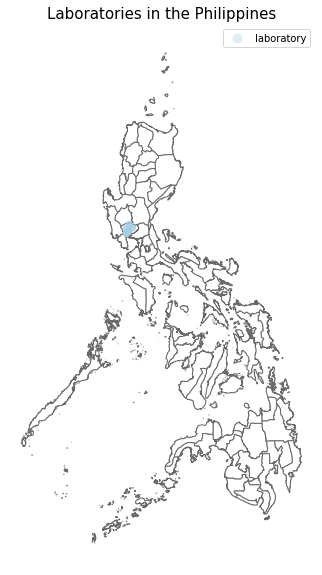

In [45]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
laboratorydata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Laboratories in the Philippines', fontsize=15)
ax.axis('off');

####Social facility

In [46]:
social_facilitydata= pd.DataFrame()
social_facilitydata= social_facilitydata.append(healthsites.loc[healthsites['amenity']=='social_facility'])
social_facilitydata=social_facilitydata.reset_index(drop=True)
social_facilitydata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,5002375322,node,18.0,,social_facility,,Santo Rosario,,,50707968.0,,,,7ff81fbb74ad43fb9f92a828d074a479,,,,,,,2.0,,2017-07-31T05:16:13,,3004,,Bahay Pagbabago,,GOwin,,,,,rehabilitation,,None,None,POINT (120.85745 14.86977)
1,7039925386,node,25.0,,social_facility,blood_check,,Lucena Social Hygiene Clinic,,82415190.0,,,+63 42 710 8380,f965a066e9c54d3e8c30011400c38c99,,,,,,,3.0,,2020-03-20T05:10:12,,,,Lucena Social Hygiene Clinic,,GOwin,,,,,laboratory,government,None,None,POINT (121.61098 13.94791)
2,7123677187,node,21.0,,social_facility,blood_check,,Saint Frances Cabrini Medical Center,,79522325.0,,,+6343 7784811; +6343 3182432,ce3b26b928f94c98840ac14ab7893985,,,,,,,3.0,,2020-01-13T18:15:52,,,,,,GrabPHMikko,,,,,laboratory,private,None,None,POINT (121.14516 14.10903)


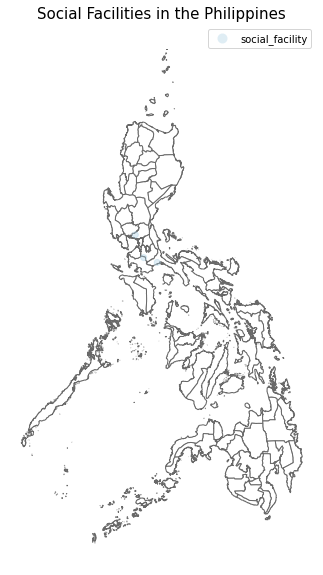

In [47]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
social_facilitydata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Social Facilities in the Philippines', fontsize=15)
ax.axis('off');

####Healthcare

In [48]:
healthcaredata= pd.DataFrame()
healthcaredata= healthcaredata.append(healthsites.loc[healthsites['amenity']=='healthcare'])
healthcaredata=healthcaredata.reset_index(drop=True)
healthcaredata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,5950372084,node,15.0,,healthcare,,General T. de Leon,,,84991753.0,,,,2ed104a068eb4080a22d3e1626ae646d,,,,,,,2.0,,2020-05-11T01:04:16,,,,Peso Plus Drug,,GOwin,,,,,pharmacy,,None,None,POINT (120.97741 14.68952)


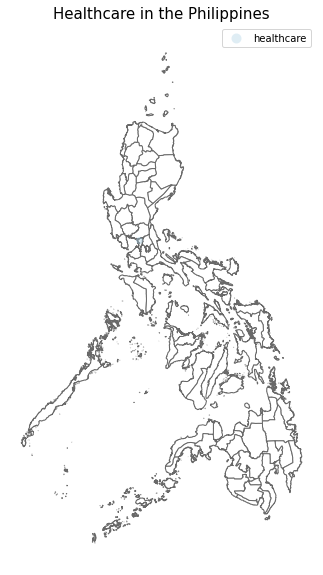

In [49]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthcaredata.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Healthcare in the Philippines', fontsize=15)
ax.axis('off');

####Combined Maps

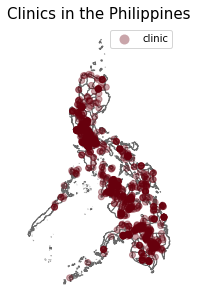

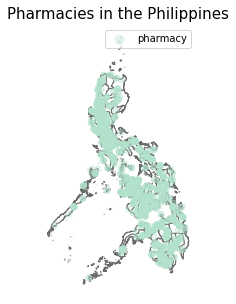

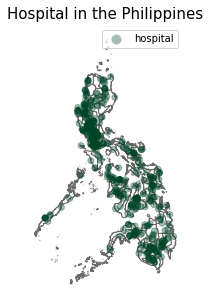

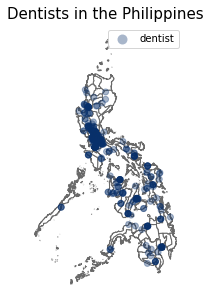

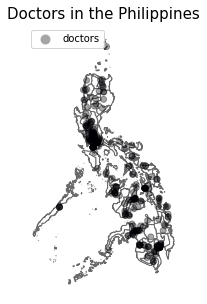

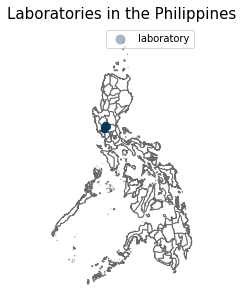

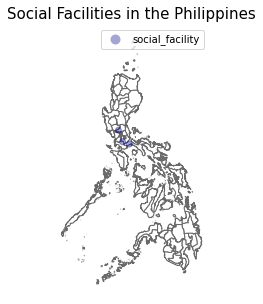

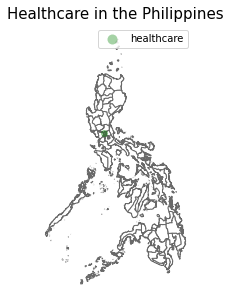

In [50]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
clinicdata.plot(ax=ax, column="amenity", cmap="Reds_r", alpha=0.35, legend=True)
ax.set_title('Clinics in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
pharmacydata.plot(ax=ax, column="amenity", cmap="Pastel2", alpha=0.35, legend=True)
ax.set_title('Pharmacies in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
hospitaldata.plot(ax=ax, column="amenity", cmap="YlGn_r", alpha=0.35, legend=True)
ax.set_title('Hospital in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
dentistdata.plot(ax=ax, column="amenity", cmap="Blues_r", alpha=0.35, legend=True)
ax.set_title('Dentists in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
doctorsdata.plot(ax=ax, column="amenity", cmap="magma", alpha=0.35, legend=True)
ax.set_title('Doctors in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
laboratorydata.plot(ax=ax, column="amenity", cmap="PuBu_r", alpha=0.35, legend=True)
ax.set_title('Laboratories in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
social_facilitydata.plot(ax=ax, column="amenity", cmap="jet", alpha=0.35, legend=True)
ax.set_title('Social Facilities in the Philippines', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthcaredata.plot(ax=ax, column="amenity", cmap="ocean", alpha=0.35, legend=True)
ax.set_title('Healthcare in the Philippines', fontsize=15)
ax.axis('off');

##Exercise

###Metro Manila

In [51]:
# stations_within = gpd.sjoin(citi_gdf, taxi, op='within')
# stations_within.head()
# "in which taxi zone is the station located?"
# "in which city is the clinic located?"

# clinic
# pharmacy                        
# hospital           
# dentist             
# doctors             
# laboratory           
# social_facility       
# healthcare            
mm = ph[ph.NAME_1=="Metropolitan Manila"]

mm_clinic = gpd.sjoin(clinicdata, mm, op='within')
mm_pharmacy = gpd.sjoin(pharmacydata, mm, op='within')
mm_hospital = gpd.sjoin(hospitaldata, mm, op='within')
mm_dentist = gpd.sjoin(dentistdata, mm, op='within')
mm_doctors = gpd.sjoin(doctorsdata, mm, op='within')
mm_laboratory = gpd.sjoin(laboratorydata, mm, op='within')
mm_social_facility = gpd.sjoin(social_facilitydata, mm, op='within')
mm_healthcare = gpd.sjoin(healthcaredata, mm, op='within')



mm_clinic= mm_clinic.reset_index(drop=True)
mm_pharmacy = mm_pharmacy.reset_index(drop=True)
mm_hospital = mm_hospital.reset_index(drop=True)
mm_dentist = mm_dentist.reset_index(drop=True)
mm_doctors = mm_doctors.reset_index(drop=True)
mm_laboratory = mm_laboratory.reset_index(drop=True)
mm_social_facility = mm_social_facility.reset_index(drop=True)
mm_healthcare = mm_healthcare.reset_index(drop=True)

#mm_clinic.tail(3) 532
#mm_pharmacy.tail(3) 957
#mm_hospital.tail(3) 286
#mm_dentist.tail(3) 228
#mm_doctors.tail(3) 53
#mm_laboratory.tail(3) 0
#mm_social_facility.tail(3) 0
#mm_healthcare.tail(3) 1

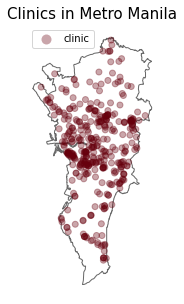

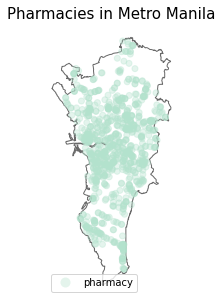

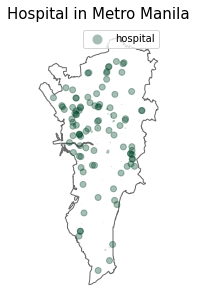

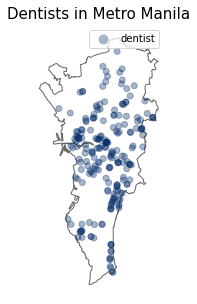

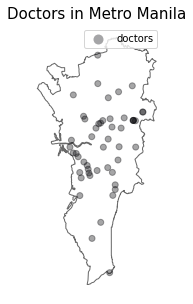

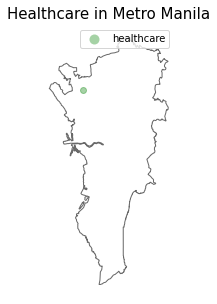

In [52]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_clinic.plot(ax=ax, column="amenity", cmap="Reds_r", alpha=0.35, legend=True)
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_pharmacy.plot(ax=ax, column="amenity", cmap="Pastel2", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_hospital.plot(ax=ax, column="amenity", cmap="YlGn_r", alpha=0.35, legend=True)
ax.set_title('Hospital in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_dentist.plot(ax=ax, column="amenity", cmap="Blues_r", alpha=0.35, legend=True)
ax.set_title('Dentists in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_doctors.plot(ax=ax, column="amenity", cmap="magma", alpha=0.35, legend=True)
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_healthcare.plot(ax=ax, column="amenity", cmap="ocean", alpha=0.35, legend=True)
ax.set_title('Healthcare in Metro Manila', fontsize=15)
ax.axis('off');

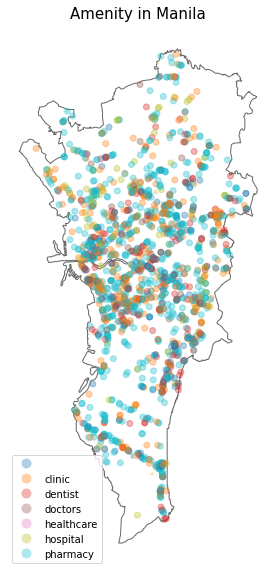

In [53]:
mm_data = gpd.sjoin(healthsites, mm, op='within')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_data.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Amenity in Manila', fontsize=15)
ax.axis('off');

###Bulacan

In [54]:
bul = ph[ph.NAME_1=="Bulacan"]

bul_clinic = gpd.sjoin(clinicdata, bul, op='within')
bul_pharmacy = gpd.sjoin(pharmacydata, bul, op='within')
bul_hospital = gpd.sjoin(hospitaldata, bul, op='within')
bul_dentist = gpd.sjoin(dentistdata, bul, op='within')
bul_doctors = gpd.sjoin(doctorsdata, bul, op='within')
bul_laboratory = gpd.sjoin(laboratorydata, bul, op='within')
bul_social_facility = gpd.sjoin(social_facilitydata, bul, op='within')
bul_healthcare = gpd.sjoin(healthcaredata, bul, op='within')



bul_clinic= bul_clinic.reset_index(drop=True)
bul_pharmacy = bul_pharmacy.reset_index(drop=True)
bul_hospital = bul_hospital.reset_index(drop=True)
bul_dentist = bul_dentist.reset_index(drop=True)
bul_doctors = bul_doctors.reset_index(drop=True)
bul_laboratory = bul_laboratory.reset_index(drop=True)
bul_social_facility = bul_social_facility.reset_index(drop=True)
bul_healthcare = bul_healthcare.reset_index(drop=True)

# bul_clinic.tail(3) 66
# bul_pharmacy.tail(3) 123
# bul_hospital.tail(3) 101
# bul_dentist.tail(3) 25
# bul_doctors.tail(3) 4
# bul_laboratory.tail(3) 0
# bul_social_facility.tail(3) 1
# bul_healthcare.tail(3) 0

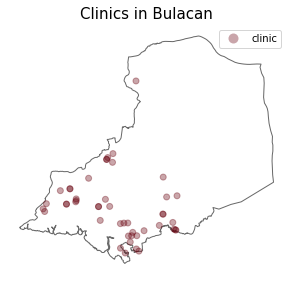

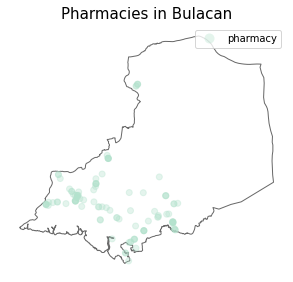

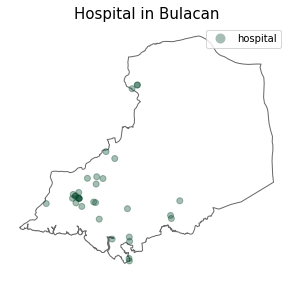

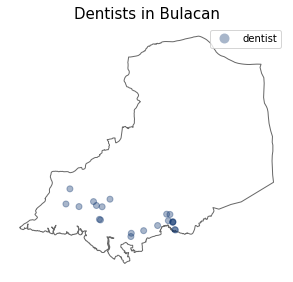

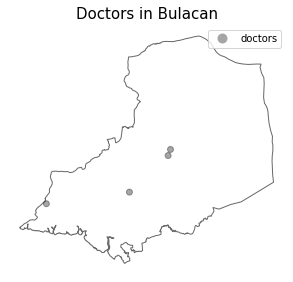

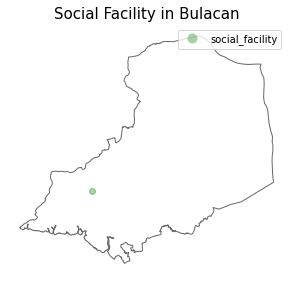

In [55]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_clinic.plot(ax=ax, column="amenity", cmap="Reds_r", alpha=0.35, legend=True)
ax.set_title('Clinics in Bulacan', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_pharmacy.plot(ax=ax, column="amenity", cmap="Pastel2", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Bulacan', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_hospital.plot(ax=ax, column="amenity", cmap="YlGn_r", alpha=0.35, legend=True)
ax.set_title('Hospital in Bulacan', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_dentist.plot(ax=ax, column="amenity", cmap="Blues_r", alpha=0.35, legend=True)
ax.set_title('Dentists in Bulacan', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_doctors.plot(ax=ax, column="amenity", cmap="magma", alpha=0.35, legend=True)
ax.set_title('Doctors in Bulacan', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_social_facility.plot(ax=ax, column="amenity", cmap="ocean", alpha=0.35, legend=True)
ax.set_title('Social Facility in Bulacan', fontsize=15)
ax.axis('off');



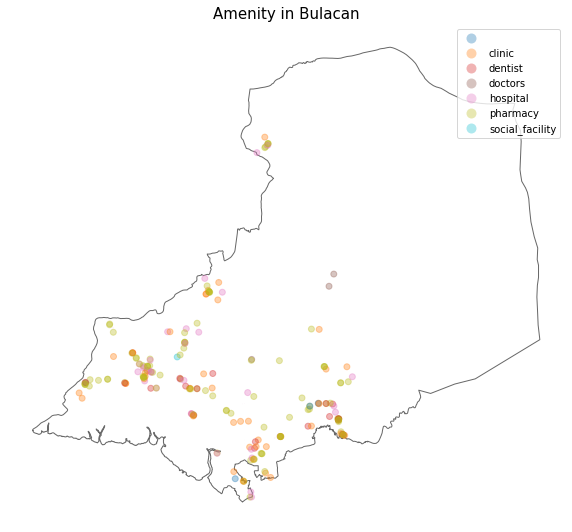

In [58]:
bul_data = gpd.sjoin(healthsites, bul, op='within')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
bul.plot(ax=ax, color='white', edgecolor='dimgray')
bul_data.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Amenity in Bulacan', fontsize=15)
ax.axis('off');